In [682]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [683]:
data = pd.read_table('Airfares.txt',delim_whitespace=True,header=None)

In [684]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [685]:
data.columns = ['City1','City2','Average_fare','Distance','Avg_weekly_pass','Leading_Airline','Leading_Airline_market_share','Avg_fare_lead','Low_price_airline','Low_airline_market_share','Avg_fare_low']

In [686]:
data.head()

,City1,City2,Average_fare,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share,Avg_fare_low
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [687]:
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 1000
Columns: 11


In [688]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City1                         1000 non-null   object 
 1   City2                         1000 non-null   object 
 2   Average_fare                  1000 non-null   float64
 3   Distance                      1000 non-null   int64  
 4   Avg_weekly_pass               1000 non-null   float64
 5   Leading_Airline               1000 non-null   object 
 6   Leading_Airline_market_share  1000 non-null   float64
 7   Avg_fare_lead                 1000 non-null   float64
 8   Low_price_airline             1000 non-null   object 
 9   Low_airline_market_share      1000 non-null   float64
 10  Avg_fare_low                  1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [689]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Average_fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Avg_weekly_pass,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Leading_Airline_market_share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Avg_fare_lead,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Low_airline_market_share,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Avg_fare_low,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [690]:
data.describe(include='object').T

,count,unique,top,freq
City1,1000,90,ATL,64
City2,1000,85,TPA,46
Leading_Airline,1000,16,WN,257
Low_price_airline,1000,19,WN,230


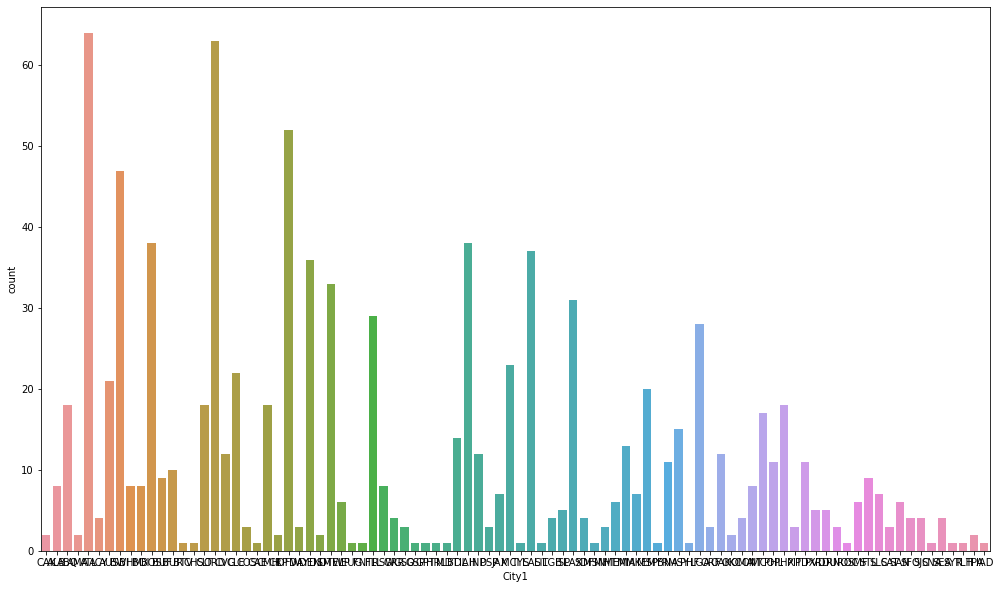

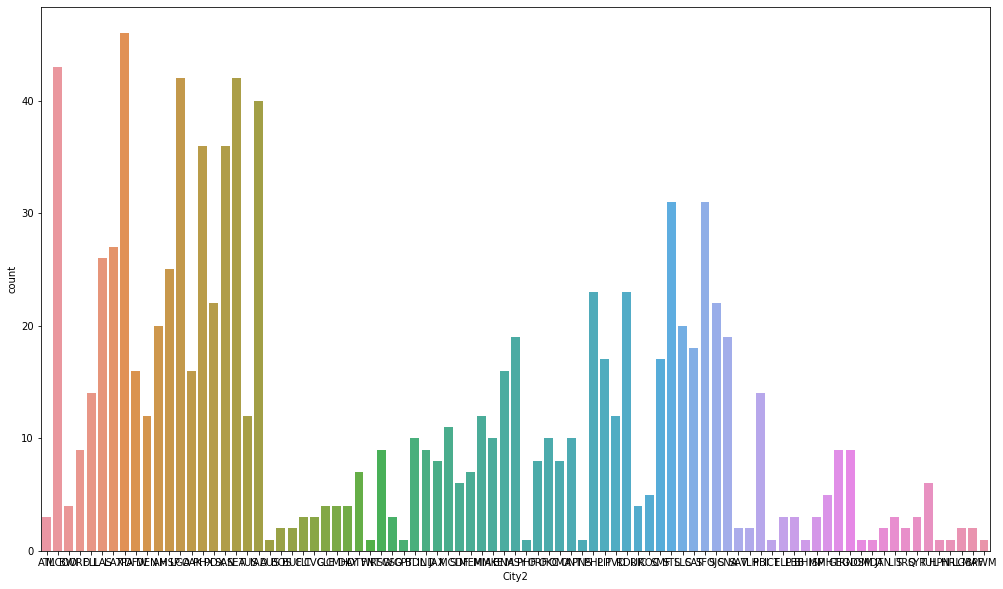

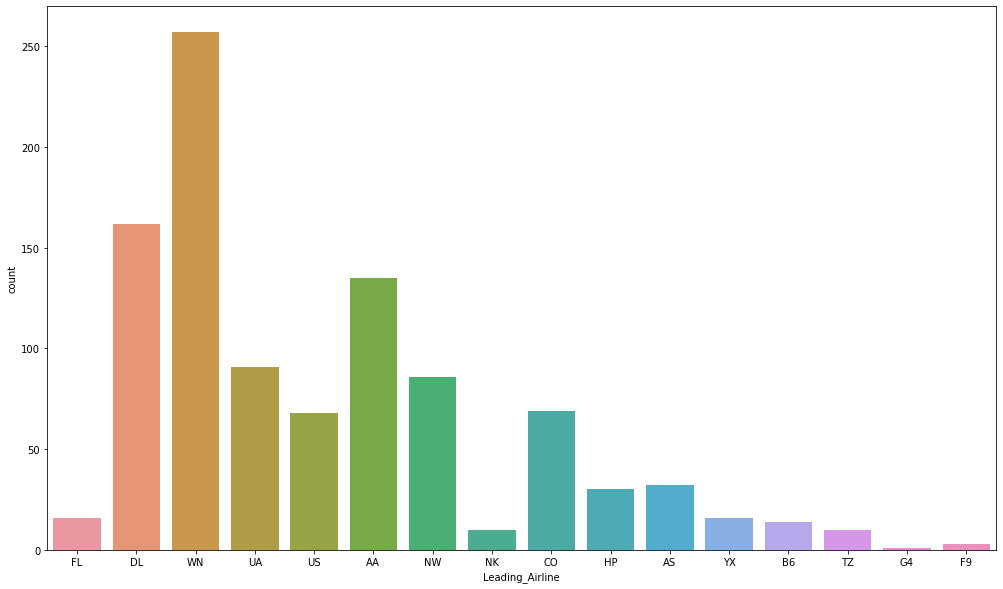

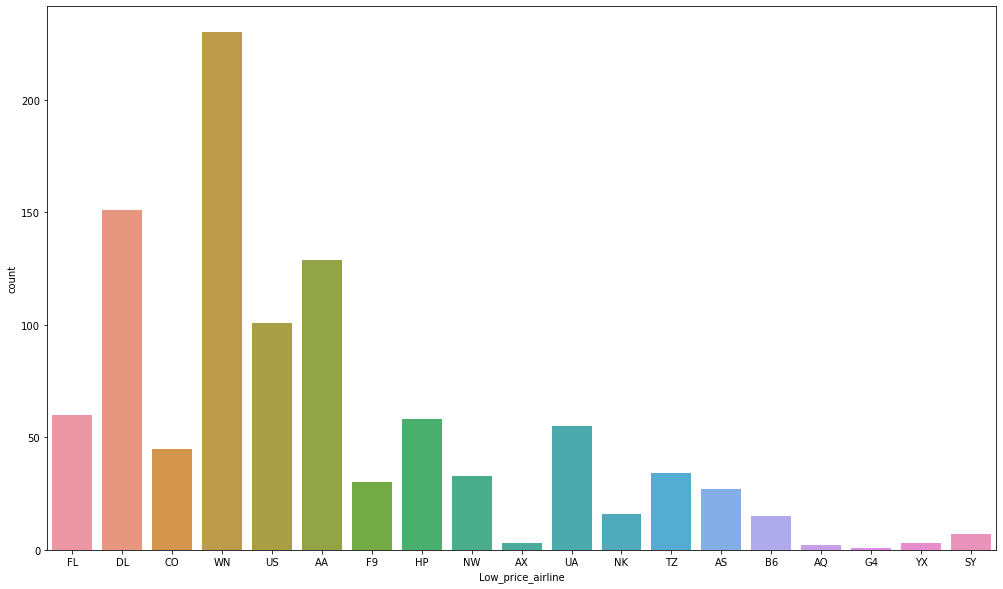

In [691]:
# Count Plot of categorical columns
for i in ['City1','City2','Leading_Airline','Low_price_airline']:
    plt.figure(figsize=(17,10))
    sns.countplot(data[i])

In [692]:
for i in ['Leading_Airline','Low_price_airline']:
    print(i)
    print(round((data[i].value_counts()/len(data[i]))*100,2))
    print()

Leading_Airline
WN    25.7
DL    16.2
AA    13.5
UA     9.1
NW     8.6
CO     6.9
US     6.8
AS     3.2
HP     3.0
FL     1.6
YX     1.6
B6     1.4
NK     1.0
TZ     1.0
F9     0.3
G4     0.1
Name: Leading_Airline, dtype: float64

Low_price_airline
WN    23.0
DL    15.1
AA    12.9
US    10.1
FL     6.0
HP     5.8
UA     5.5
CO     4.5
TZ     3.4
NW     3.3
F9     3.0
AS     2.7
NK     1.6
B6     1.5
SY     0.7
YX     0.3
AX     0.3
AQ     0.2
G4     0.1
Name: Low_price_airline, dtype: float64



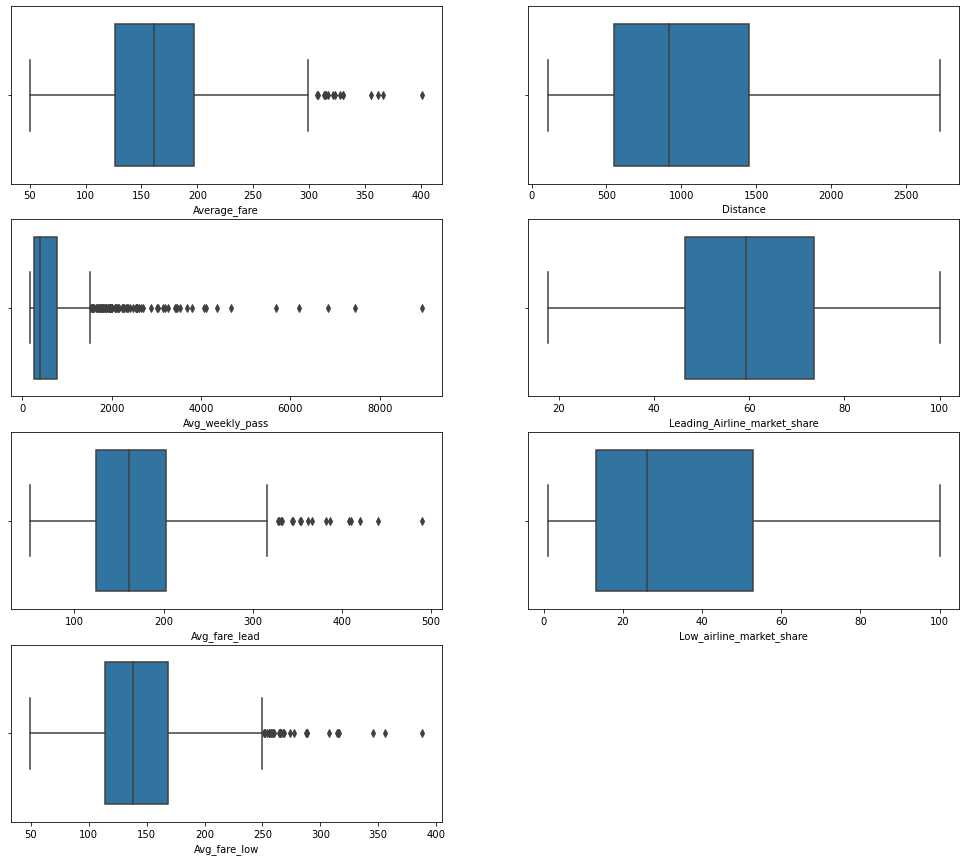

In [693]:
# BOX Plot for Numeric columns
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t=t+1

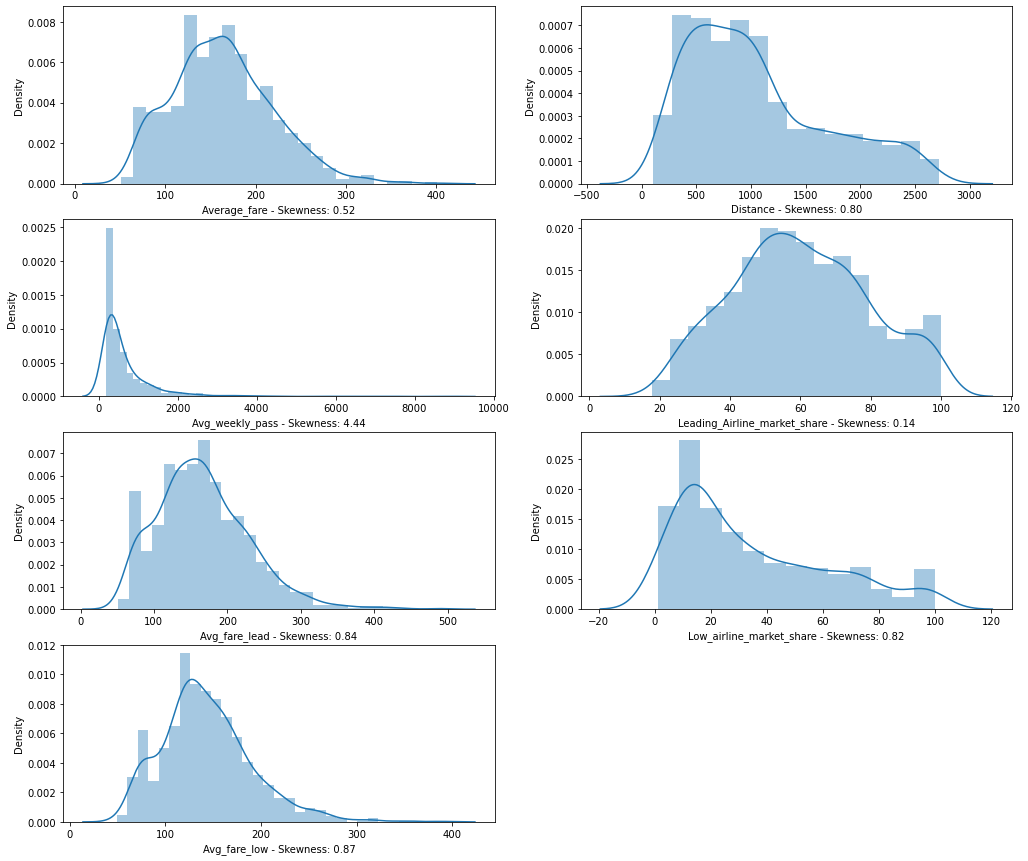

In [694]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s - Skewness: %.2f'%(i,data[i].skew()))
    t=t+1

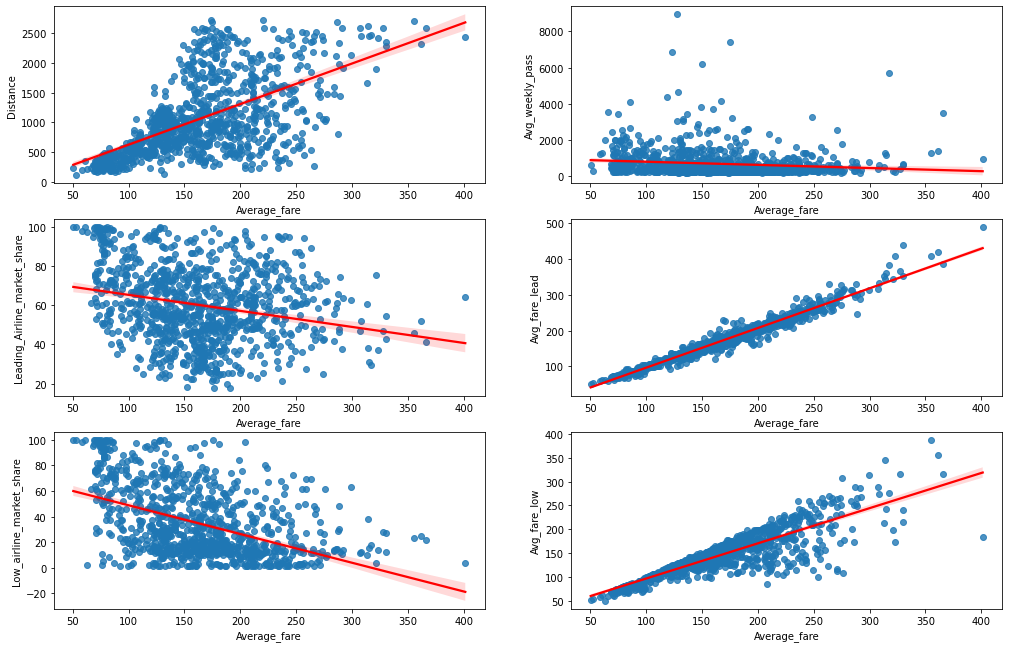

In [695]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    if i!='Average_fare':
        plt.subplot(4,2,t)
        sns.regplot(data['Average_fare'],data[i],line_kws={'color':'r'})
        t=t+1

<AxesSubplot:>

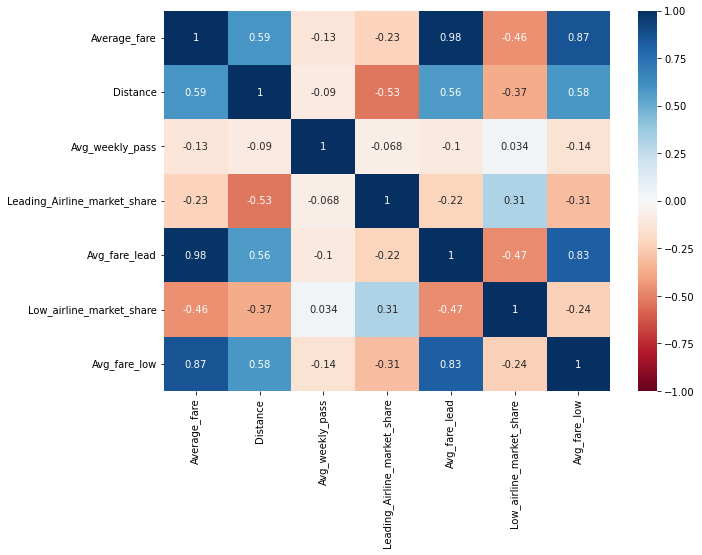

In [696]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')

<AxesSubplot:>

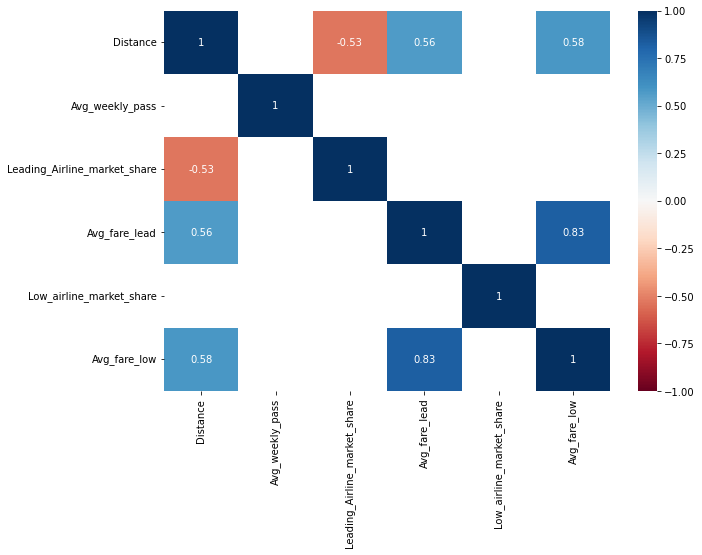

In [697]:
data_wy = data.drop(columns=['Average_fare'])
plt.figure(figsize=(10,7))
sns.heatmap(data_wy.corr()[(data.corr()>0.5)|(data.corr()<-0.5)],annot=True,vmax=1,vmin=-1,cmap='RdBu')

In [698]:
abs(data.corr()['Average_fare']).sort_values(ascending=False)

Average_fare                    1.000000
Avg_fare_lead                   0.981462
Avg_fare_low                    0.866410
Distance                        0.587169
Low_airline_market_share        0.458660
Leading_Airline_market_share    0.234142
Avg_weekly_pass                 0.126175
Name: Average_fare, dtype: float64

In [699]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [700]:
numeric = data_wy.select_dtypes(include=np.number)

In [701]:
vif = [variance_inflation_factor(numeric.values,i) for i in range(numeric.shape[1])]

In [702]:
pd.DataFrame({'VIF':vif[:]},index=numeric.columns)

,VIF
Distance,6.530828
Avg_weekly_pass,1.670023
Leading_Airline_market_share,8.101225
Avg_fare_lead,36.956474
Low_airline_market_share,4.036873
Avg_fare_low,39.000002


In [703]:
data.drop(columns=['Avg_fare_low'],inplace=True)

In [704]:
data

,City1,City2,Average_fare,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40


In [705]:
# Outlier Treatment (Capping)

for i in data.select_dtypes(include=np.number).columns:
    Q1,Q3 = np.quantile(data[i],[0.25,0.75])
    IQR = Q3-Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)
    
    data.loc[data[i]>UL,i]= UL
    data.loc[data[i]<LL,i]= LL

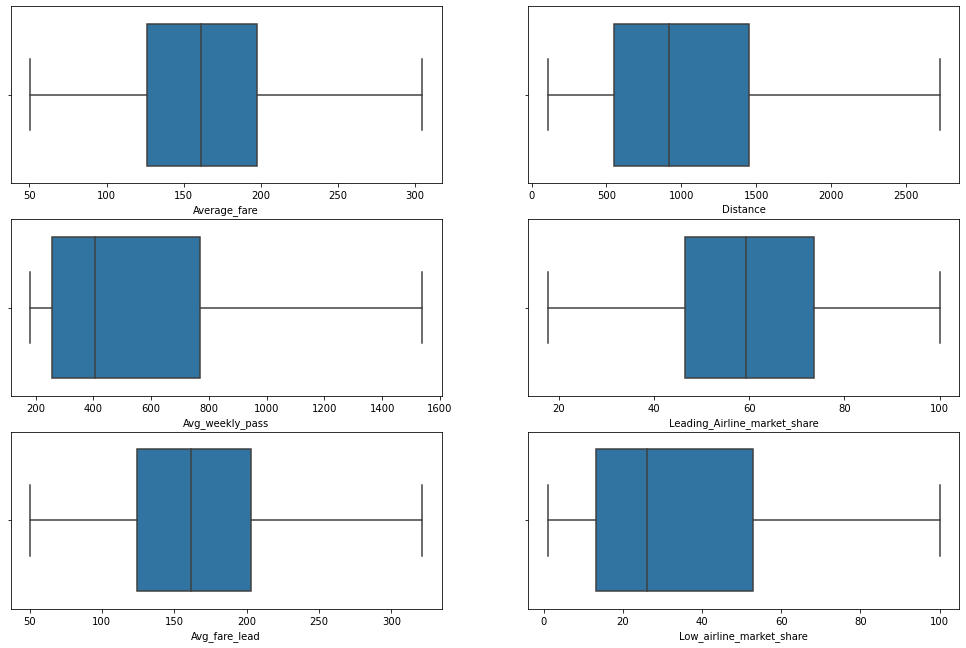

In [706]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t=t+1

In [707]:
# Perform The Significance Test

In [708]:
numeric = data.select_dtypes(include=np.number).columns

In [709]:
import scipy.stats as st
sig_features = []
for i in numeric:
    if i != 'Average_fare':
        if st.ttest_ind(data[i],data['Average_fare'])[1]<0.05:
            print(i,st.ttest_ind(data[i],data['Average_fare'])[1])
            sig_features.append(i)
            
print(sig_features)


Distance 2.5507937972858612e-294
Avg_weekly_pass 4.76790171898488e-175
Leading_Airline_market_share 0.0
Low_airline_market_share 0.0
['Distance', 'Avg_weekly_pass', 'Leading_Airline_market_share', 'Low_airline_market_share']


In [710]:
categorical = data.select_dtypes(include='object')

In [711]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

for i in categorical:
    mod = ols('Average_fare ~ %s'%(i),data=data).fit()
    aov = sm.stats.anova_lm(mod,typ=2)
    print(aov)

                sum_sq     df         F        PR(>F)
City1     7.981607e+05   89.0  3.844617  2.892156e-25
Residual  2.122700e+06  910.0       NaN           NaN
                sum_sq     df         F        PR(>F)
City2     7.158136e+05   84.0  3.536095  3.863020e-21
Residual  2.205047e+06  915.0       NaN           NaN
                       sum_sq     df          F         PR(>F)
Leading_Airline  1.203685e+06   15.0  45.983487  1.779566e-102
Residual         1.717176e+06  984.0        NaN            NaN
                         sum_sq     df          F        PR(>F)
Low_price_airline  7.430066e+05   18.0  18.593468  4.856008e-51
Residual           2.177854e+06  981.0        NaN           NaN


## Split the dataset in 80:20 Ratio

In [712]:
x = data.drop(columns=['Average_fare'])
y = data['Average_fare']

In [713]:
x

,City1,City2,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,CAK,ATL,528,424.560,FL,70.19,111.03000,FL,70.19
1,CAK,MCO,860,276.840,FL,75.10,123.09000,DL,17.23
2,ALB,ATL,852,215.760,DL,78.89,223.98000,CO,2.77
3,ALB,BWI,288,606.840,WN,96.97,68.86000,WN,96.97
4,ALB,ORD,723,313.040,UA,39.79,161.36000,WN,15.34
5,ALB,FLL,1204,199.020,WN,40.68,137.97000,DL,17.09
6,ALB,LAS,2237,237.170,WN,59.94,148.59000,WN,59.94
7,ALB,LAX,2467,191.950,DL,17.89,205.06000,US,16.59
8,ALB,MCO,1073,550.540,WN,76.84,127.69000,WN,76.84
9,ALB,TPA,1130,202.930,US,35.40,132.91000,DL,26.40


In [714]:
freq_map = {}
for i in categorical.columns:
    freq_map[i]=x[i].value_counts().to_dict()

In [715]:
freq_map

{'City1': {'ATL': 64,
  'ORD': 63,
  'DFW': 52,
  'BWI': 47,
  'IAH': 38,
  'BOS': 38,
  'LAS': 37,
  'DEN': 36,
  'DTW': 33,
  'LAX': 31,
  'FLL': 29,
  'LGA': 28,
  'MCI': 23,
  'CLE': 22,
  'AUS': 21,
  'MSP': 20,
  'CLT': 18,
  'CMH': 18,
  'PHX': 18,
  'ABQ': 18,
  'MCO': 17,
  'MSY': 15,
  'BDL': 14,
  'MIA': 13,
  'IND': 12,
  'OAK': 12,
  'CVG': 12,
  'PHL': 11,
  'PDX': 11,
  'BNA': 11,
  'BUR': 10,
  'STL': 9,
  'BUF': 9,
  'RSW': 8,
  'BHM': 8,
  'ONT': 8,
  'BOI': 8,
  'ALB': 8,
  'MKE': 7,
  'SLC': 7,
  'JAX': 7,
  'MEM': 6,
  'SMF': 6,
  'ELP': 6,
  'SAN': 6,
  'PVD': 5,
  'ISP': 5,
  'RDU': 5,
  'LGB': 4,
  'SFO': 4,
  'ACY': 4,
  'SEA': 4,
  'SJC': 4,
  'GRR': 4,
  'SDF': 4,
  'OMA': 4,
  'MHT': 3,
  'RNO': 3,
  'GSO': 3,
  'COS': 3,
  'SAT': 3,
  'PSP': 3,
  'DAY': 3,
  'ORF': 3,
  'PIT': 3,
  'AMA': 2,
  'TPA': 2,
  'CAK': 2,
  'OKC': 2,
  'CRP': 2,
  'DSM': 2,
  'SYR': 1,
  'TLH': 1,
  'SNA': 1,
  'ROC': 1,
  'TYS': 1,
  'PHF': 1,
  'MYR': 1,
  'MSN': 1,
  'LIT': 1,


In [716]:
for i in categorical.columns:
    x[i]= x[i].map(freq_map[i])

In [717]:
x.head()

,City1,City2,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,2,3,528,424.56,16,70.19,111.03,60,70.19
1,2,43,860,276.84,16,75.10,123.09,151,17.23
2,8,3,852,215.76,162,78.89,223.98,45,2.77
3,8,4,288,606.84,257,96.97,68.86,230,96.97
4,8,9,723,313.04,91,39.79,161.36,230,15.34


In [718]:
from sklearn.model_selection import train_test_split

In [719]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)

In [720]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 9), (200, 9), (800,), (200,))

In [721]:
from sklearn.preprocessing import StandardScaler

In [722]:
sc = StandardScaler()

In [723]:
x_train_s= sc.fit_transform(x_train)

In [724]:
x_train_s = pd.DataFrame(x_train_s,columns=x_train.columns)

In [725]:
x_train_s

,City1,City2,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,-1.028698,0.166730,-0.848109,-0.763722,1.476092,1.308167,-1.111178,0.443054,-0.845512
1,-0.669842,1.201284,-0.145216,-0.090152,-0.832592,-0.810343,0.415129,-0.846417,-0.474584
2,0.457989,0.905697,-1.261391,2.274302,1.476092,0.794589,-1.631472,1.504181,1.497190
3,-1.131228,-0.276651,-0.829324,-0.470754,0.315642,0.720633,-0.756839,0.443054,1.444148
4,0.509254,-1.015619,-0.315852,-0.713292,-1.467786,0.388348,0.485963,-0.779257,-1.227122
5,0.047869,0.905697,1.424943,-0.475416,-1.296772,-1.615119,0.297578,0.147550,-0.672019
6,1.790881,-0.128858,1.215171,0.413765,-0.551641,-1.108218,0.180027,-1.128488,-0.589141
7,-1.233758,0.092833,-1.023441,-0.927381,-0.612717,1.159743,0.309215,-1.128488,-0.897817
8,0.047869,-0.350548,-0.608593,-0.554272,1.476092,0.805887,-0.454782,0.443054,-0.693752
9,-0.874903,-0.498341,-1.244171,0.149009,-0.832592,2.049260,0.168390,-0.228545,2.397067


In [726]:
import statsmodels.api as sm

In [727]:
X = sm.add_constant(x_train_s)

In [728]:
X

,const,City1,City2,Distance,Avg_weekly_pass,Leading_Airline,Leading_Airline_market_share,Avg_fare_lead,Low_price_airline,Low_airline_market_share
0,1.0,-1.028698,0.166730,-0.848109,-0.763722,1.476092,1.308167,-1.111178,0.443054,-0.845512
1,1.0,-0.669842,1.201284,-0.145216,-0.090152,-0.832592,-0.810343,0.415129,-0.846417,-0.474584
2,1.0,0.457989,0.905697,-1.261391,2.274302,1.476092,0.794589,-1.631472,1.504181,1.497190
3,1.0,-1.131228,-0.276651,-0.829324,-0.470754,0.315642,0.720633,-0.756839,0.443054,1.444148
4,1.0,0.509254,-1.015619,-0.315852,-0.713292,-1.467786,0.388348,0.485963,-0.779257,-1.227122
5,1.0,0.047869,0.905697,1.424943,-0.475416,-1.296772,-1.615119,0.297578,0.147550,-0.672019
6,1.0,1.790881,-0.128858,1.215171,0.413765,-0.551641,-1.108218,0.180027,-1.128488,-0.589141
7,1.0,-1.233758,0.092833,-1.023441,-0.927381,-0.612717,1.159743,0.309215,-1.128488,-0.897817
8,1.0,0.047869,-0.350548,-0.608593,-0.554272,1.476092,0.805887,-0.454782,0.443054,-0.693752
9,1.0,-0.874903,-0.498341,-1.244171,0.149009,-0.832592,2.049260,0.168390,-0.228545,2.397067


## FIT a base model

In [729]:
y_train = y_train.reset_index()

In [730]:
y_train.drop(columns=['index'],inplace=True)

In [731]:
base_model = sm.OLS(y_train,X).fit()

In [732]:
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Average_fare   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:29:20   Log-Likelihood:                -2924.3
No. Observations:                 800   AIC:                             5869.
Df Residuals:                     790   BIC:                             5915.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [733]:
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [734]:
pd.DataFrame({'VIF':vif[:]},index=X.columns)

,VIF
const,1.000000
City1,1.653988
City2,1.609868
Distance,2.043862
Avg_weekly_pass,1.373874
Leading_Airline,1.456610
Leading_Airline_market_share,1.553590
Avg_fare_lead,2.044595
Low_price_airline,1.409422
Low_airline_market_share,1.501929


<AxesSubplot:>

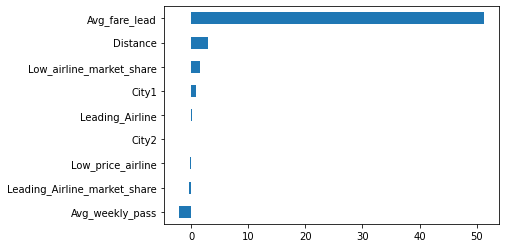

In [735]:
base_model.params[1:].sort_values().plot(kind='barh')

In [736]:
x_test_s = sc.fit_transform(x_test)

In [737]:
X_t = sm.add_constant(x_test_s)

In [738]:
y_pred = base_model.predict(X_t)

In [739]:
from sklearn.metrics import r2_score,mean_squared_error

In [740]:
y_pred_train = base_model.predict(X)

In [741]:
rmse_train = (mean_squared_error(y_train,y_pred_train))**0.5

In [742]:
rmse_train

9.359393294015833

In [743]:
rmse_test = (mean_squared_error(y_test,y_pred))**0.5

In [744]:
rmse_test

9.854867305894821

In [745]:
r2_score(y_test,y_pred)

0.9684825427371508

<AxesSubplot:ylabel='Density'>

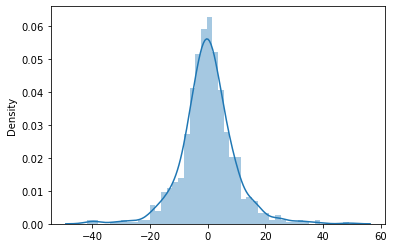

In [746]:
sns.distplot(base_model.resid)

In [747]:
from statsmodels.graphics.gofplots import qqplot

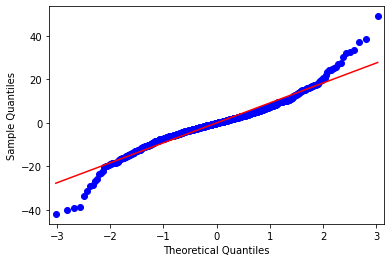

In [748]:
qqplot(base_model.resid,line='r')
plt.show()

In [749]:
base_model.resid.skew()

0.0734565566514817

In [750]:
base_model.resid.kurt()

3.644987158581147

## Model with Variable Tranformation

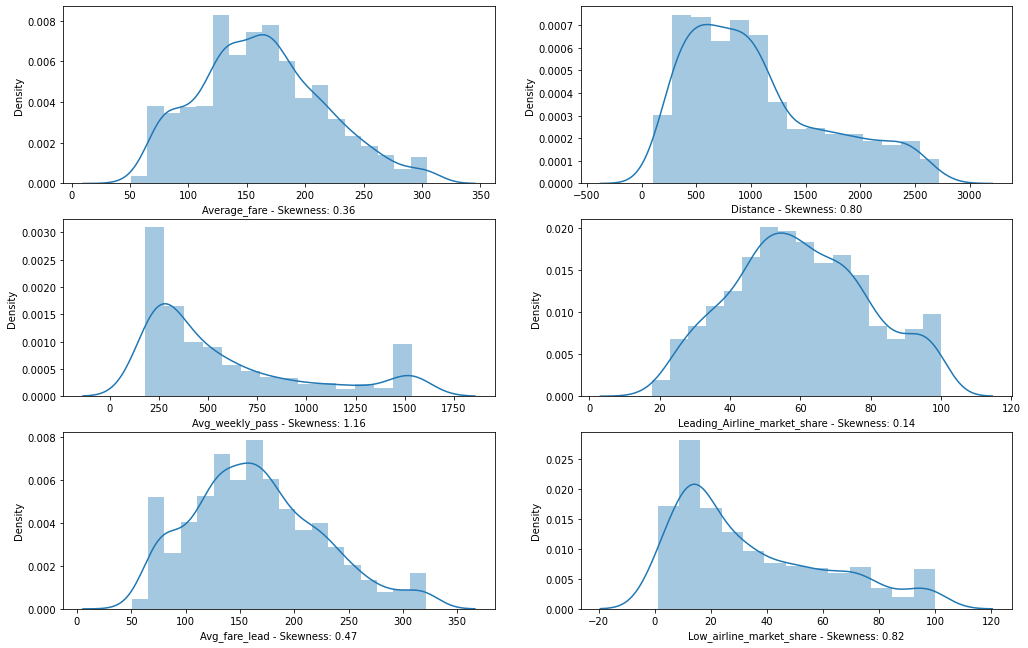

In [751]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s - Skewness: %.2f'%(i,data[i].skew()))
    t=t+1

In [752]:
numeric

Index(['Average_fare', 'Distance', 'Avg_weekly_pass',
       'Leading_Airline_market_share', 'Avg_fare_lead',
       'Low_airline_market_share'],
      dtype='object')

In [753]:
for i in numeric:
    if i!='Average_fare':
        data[i] = list(np.sqrt(data[i]))

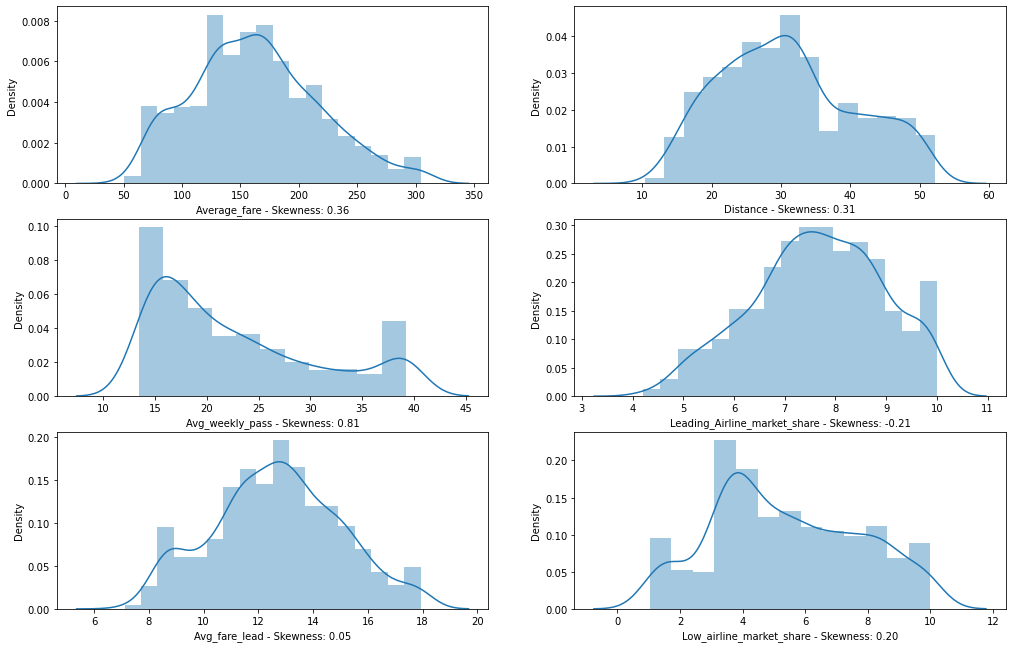

In [754]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s - Skewness: %.2f'%(i,data[i].skew()))
    t=t+1

In [755]:
x = data.drop(columns=['Average_fare'])
y = data['Average_fare']

In [756]:
freq_map = {}
for i in categorical.columns:
    freq_map[i]=x[i].value_counts().to_dict()
    
for i in categorical.columns:
    x[i]= x[i].map(freq_map[i])

In [757]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)

x_train_s= sc.fit_transform(x_train)

x_train_s = pd.DataFrame(x_train_s,columns=x_train.columns)

In [758]:
X = sm.add_constant(x_train_s)

In [759]:
y_train = y_train.reset_index()

In [760]:
y_train.drop(columns=['index'],inplace=True)

In [761]:
model_2 = sm.OLS(y_train,X).fit()

In [762]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Average_fare   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2496.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:29:25   Log-Likelihood:                -2968.4
No. Observations:                 800   AIC:                             5957.
Df Residuals:                     790   BIC:                             6004.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Let us Try some Other Models

In [763]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold

In [764]:
def model_result(model,x_train,y_train,x_test,y_test):
    print(str(model))
    n = x_train.shape[0]
    p = x_train.shape[1]
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('R2:\t',r2)
    print('Adj R2:\t',adj_r2)
    print('MSE:\t',mean_squared_error(y_test,y_pred))
    print('RMSE:\t',mean_squared_error(y_test,y_pred)**0.5,'\n')

In [765]:
kf = KFold(n_splits=2)

In [766]:
for train,test in kf.split(x_train_s,y_train):
    x_tr,x_te = x_train.iloc[train,:],x_train.iloc[test,:]
    y_tr,y_te = y_train.iloc[train,:],y_train.iloc[test,:]
    model_result(LinearRegression(),x_tr,y_tr,x_te,y_te)

LinearRegression()
R2:	 0.963909714386378
Adj R2:	 0.9630768616414482
MSE:	 94.09649749626286
RMSE:	 9.70033491670586 

LinearRegression()
R2:	 0.9635782251360382
Adj R2:	 0.9627377226391776
MSE:	 114.4270584020091
RMSE:	 10.69705839948577 



In [767]:
model_result(LinearRegression(),x_train_s,y_train,x_test_s,y_test)
model_result(SGDRegressor(),x_train_s,y_train,x_test_s,y_test)
model_result(Ridge(alpha=0.1),x_train_s,y_train,x_test_s,y_test)
model_result(ElasticNet(alpha=0.1,l1_ratio=0.2),x_train_s,y_train,x_test_s,y_test)

LinearRegression()
R2:	 0.968052981694334
Adj R2:	 0.9676890283212314
MSE:	 98.44206605785166
RMSE:	 9.921797521510488 

SGDRegressor()
R2:	 0.9681089394888913
Adj R2:	 0.9677456236096509
MSE:	 98.26963679213527
RMSE:	 9.91310429644192 

Ridge(alpha=0.1)
R2:	 0.9680517862787078
Adj R2:	 0.9676878192869462
MSE:	 98.4457496311637
RMSE:	 9.921983150114885 

ElasticNet(alpha=0.1, l1_ratio=0.2)
R2:	 0.9578502943668711
Adj R2:	 0.9573701078469999
MSE:	 129.88079408711408
RMSE:	 11.396525526980321 



In [768]:
from sklearn.model_selection import GridSearchCV

In [769]:
param={'alpha':[0.001,0.01,0.1,1,10,100],'fit_intercept':[True,False]}

In [770]:
gscv=GridSearchCV(estimator=Ridge(),param_grid=param,scoring='r2',cv=3,verbose=3)

In [771]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ...alpha=0.001, fit_intercept=True;, score=0.959 total time=   0.0s
[CV 2/3] END ...alpha=0.001, fit_intercept=True;, score=0.969 total time=   0.0s
[CV 3/3] END ...alpha=0.001, fit_intercept=True;, score=0.963 total time=   0.0s
[CV 1/3] END ..alpha=0.001, fit_intercept=False;, score=0.921 total time=   0.0s
[CV 2/3] END ..alpha=0.001, fit_intercept=False;, score=0.931 total time=   0.0s
[CV 3/3] END ..alpha=0.001, fit_intercept=False;, score=0.913 total time=   0.0s
[CV 1/3] END ....alpha=0.01, fit_intercept=True;, score=0.959 total time=   0.0s
[CV 2/3] END ....alpha=0.01, fit_intercept=True;, score=0.969 total time=   0.0s
[CV 3/3] END ....alpha=0.01, fit_intercept=True;, score=0.963 total time=   0.0s
[CV 1/3] END ...alpha=0.01, fit_intercept=False;, score=0.921 total time=   0.0s
[CV 2/3] END ...alpha=0.01, fit_intercept=False;, score=0.931 total time=   0.0s
[CV 3/3] END ...alpha=0.01, fit_intercept=False;

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False]},
             scoring='r2', verbose=3)

In [772]:
gscv.best_params_

{'alpha': 0.001, 'fit_intercept': True}

In [773]:
gscv.best_score_

0.9636807864344203

In [774]:
model_ridge=Ridge(**gscv.best_params_)

In [775]:
model_ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [776]:
model_ridge

Ridge(alpha=0.001)

In [777]:
param={'alpha':[0.001,0.01,0.1,1,10,100],'l1_ratio':[0.1,10,20,20,40]}

In [778]:
en=GridSearchCV(estimator=ElasticNet(),param_grid=param,scoring='r2',cv=3,verbose=3)

In [779]:
en.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END .........alpha=0.001, l1_ratio=0.1;, score=0.959 total time=   0.0s
[CV 2/3] END .........alpha=0.001, l1_ratio=0.1;, score=0.969 total time=   0.0s
[CV 3/3] END .........alpha=0.001, l1_ratio=0.1;, score=0.963 total time=   0.0s
[CV 1/3] END ............alpha=0.001, l1_ratio=10;, score=nan total time=   0.0s
[CV 2/3] END ............alpha=0.001, l1_ratio=10;, score=nan total time=   0.0s
[CV 3/3] END ............alpha=0.001, l1_ratio=10;, score=nan total time=   0.0s
[CV 1/3] END ............alpha=0.001, l1_ratio=20;, score=nan total time=   0.0s
[CV 2/3] END ............alpha=0.001, l1_ratio=20;, score=nan total time=   0.0s
[CV 3/3] END ............alpha=0.001, l1_ratio=20;, score=nan total time=   0.0s
[CV 1/3] END ............alpha=0.001, l1_ratio=20;, score=nan total time=   0.0s
[CV 2/3] END ............alpha=0.001, l1_ratio=20;, score=nan total time=   0.0s
[CV 3/3] END ............alpha=0.001, l1_ratio=2

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 10, 20, 20, 40]},
             scoring='r2', verbose=3)

In [780]:
en.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1}

In [781]:
en.best_score_

0.9636795713058072

In [782]:
from sklearn.linear_model import Lasso

In [783]:
df1=pd.read_csv('~/Downloads/Expense.csv',na_values=' ?')

In [784]:
df1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K


In [785]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       4680 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      4679 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  4902 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [786]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,38.6560,13.698292,17.0,28.0,37.0,48.0,90.0
education-num,5000.0,10.0650,2.558141,1.0,9.0,10.0,12.0,16.0
capital-gain,5000.0,1104.0800,7579.674371,0.0,0.0,0.0,0.0,99999.0
capital-loss,5000.0,90.0328,404.168991,0.0,0.0,0.0,0.0,3004.0
hours-per-week,5000.0,40.5662,12.154191,1.0,40.0,40.0,45.0,99.0


In [787]:
df1.describe(include='object').T

,count,unique,top,freq
workclass,4680,8,Private,3444
education,5000,16,HS-grad,1602
marital-status,5000,7,Married-civ-spouse,2294
occupation,4679,14,Craft-repair,630
relationship,5000,6,Husband,2026
race,5000,5,White,4271
sex,5000,2,Male,3374
native-country,4902,39,United-States,4459
Expense,5000,2,<=50K,3776


In [788]:
df1.isnull().sum()

age                 0
workclass         320
education           0
education-num       0
marital-status      0
occupation        321
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     98
Expense             0
dtype: int64

<AxesSubplot:>

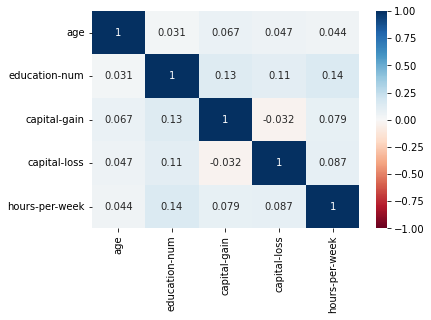

In [789]:
sns.heatmap(df1.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)

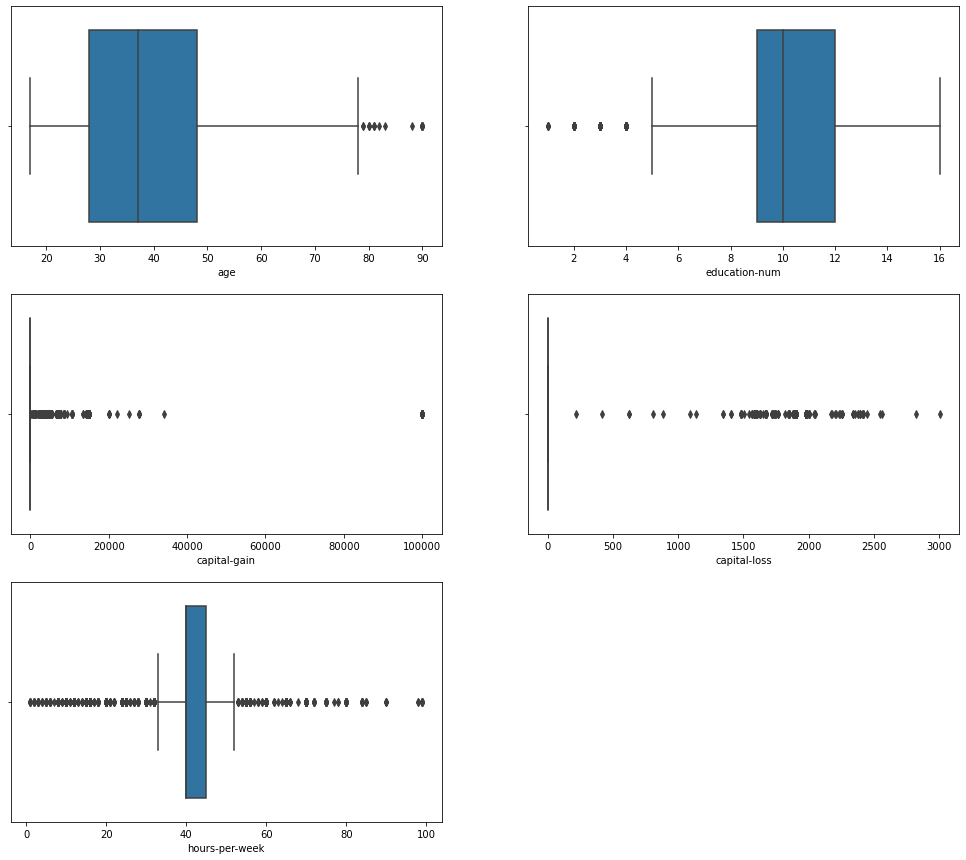

In [790]:
plt.figure(figsize=(17,15))
t=1
for i in df1.select_dtypes(include=np.number).columns:
    
    plt.subplot(3,2,t)
    sns.boxplot(df1[i])
    t=t+1

In [791]:
from scipy.stats import chi2_contingency

In [792]:
cont_table=pd.crosstab(df1['workclass'],df1['education'])

In [793]:
chi,p_val,dof,expec =chi2_contingency(cont_table)

In [794]:
p_val
# The p value is less than 0.05 and so we can conclude that two columns are dependent

1.3362767918523327e-52

In [795]:
pd.set_option('display.max_rows',None)
df1.groupby(by=['education','workclass'])['workclass'].count()

education      workclass        
 10th           Local-gov              4
                Never-worked           1
                Private              114
                Self-emp-inc           4
                Self-emp-not-inc      13
                State-gov              2
 11th           Federal-gov            2
                Local-gov              8
                Private              140
                Self-emp-inc           2
                Self-emp-not-inc       5
                State-gov              2
 12th           Federal-gov            1
                Local-gov              3
                Private               41
                Self-emp-not-inc       7
 1st-4th        Private               22
                Self-emp-not-inc       3
 5th-6th        Local-gov              1
                Private               39
                Self-emp-not-inc       2
 7th-8th        Federal-gov            1
                Local-gov              6
                Private 

In [796]:
df1['workclass'].fillna('Private',inplace=True)

In [797]:
df1.groupby(by=['education','occupation'])['occupation'].count()

education      occupation        
 10th           Adm-clerical           7
                Craft-repair          31
                Exec-managerial        5
                Farming-fishing        7
                Handlers-cleaners      9
                Machine-op-inspct     19
                Other-service         19
                Priv-house-serv        2
                Prof-specialty         1
                Protective-serv        2
                Sales                 19
                Tech-support           1
                Transport-moving      15
 11th           Adm-clerical          11
                Craft-repair          28
                Exec-managerial        3
                Farming-fishing        5
                Handlers-cleaners     13
                Machine-op-inspct     18
                Other-service         38
                Priv-house-serv        1
                Prof-specialty         3
                Sales                 22
                Tech-su

In [798]:
df1.groupby(by=['education-num','education'])['education'].count()

education-num  education    
1               Preschool          5
2               1st-4th           25
3               5th-6th           46
4               7th-8th          105
5               9th               84
6               10th             156
7               11th             179
8               12th              57
9               HS-grad         1602
10              Some-college    1142
11              Assoc-voc        214
12              Assoc-acdm       157
13              Bachelors        823
14              Masters          259
15              Prof-school       90
16              Doctorate         56
Name: education, dtype: int64

In [799]:
for i in range(1,17):
    df1['occupation']=np.where(df1['occupation'].isnull() &(df1['education-num']==i),
                              df1[df1['education-num']==i]['occupation'].mode()[0],df1['occupation'])

In [800]:
df1['native-country'].fillna(df1['native-country'].mode()[0],inplace=True)

In [801]:
for i in ['age','hours-per-week']:
    Q1,Q3 = np.quantile(df1[i],[0.25,0.75])
    IQR = Q3-Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)
    
    df1.loc[df1[i]>UL,i]= UL
    df1.loc[df1[i]<LL,i]= LL

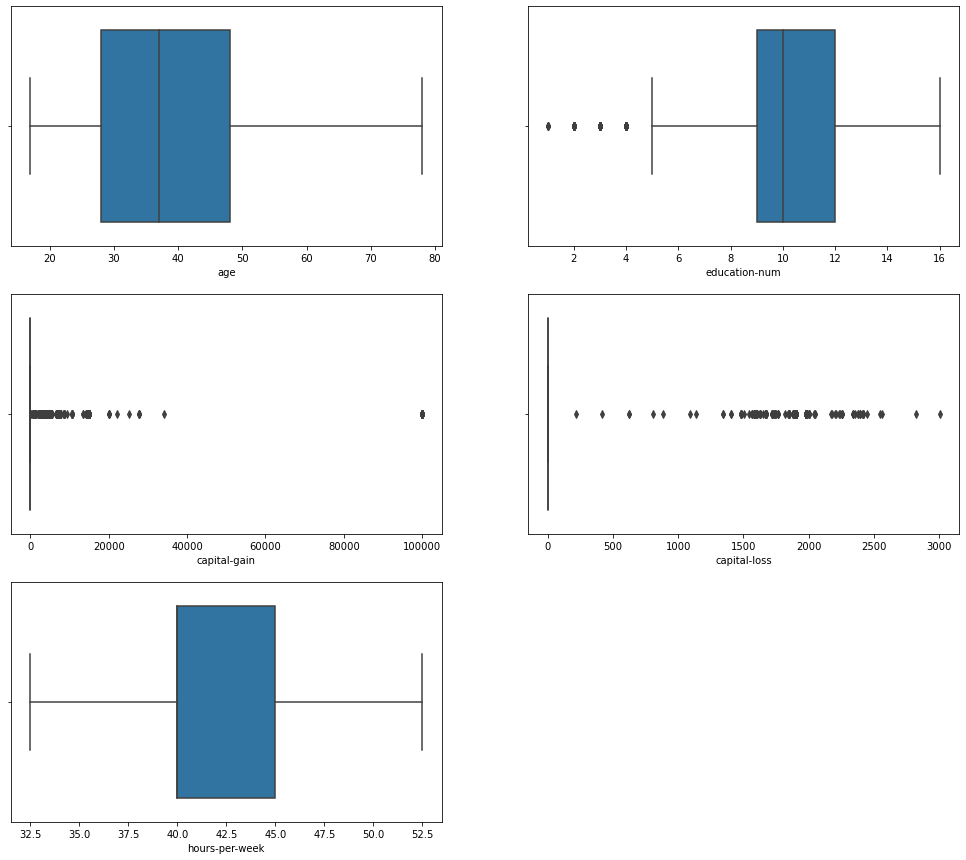

In [802]:
plt.figure(figsize=(17,15))
t=1
for i in df1.select_dtypes(include=np.number).columns:
    
    plt.subplot(3,2,t)
    sns.boxplot(df1[i])
    t=t+1

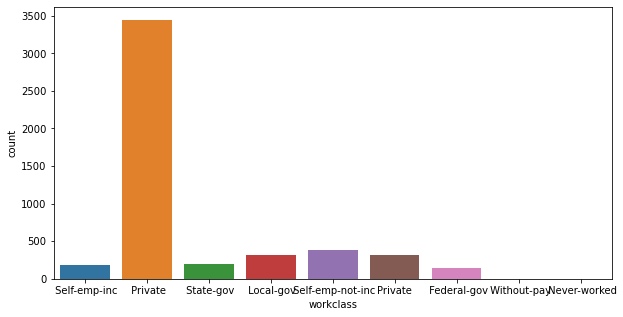

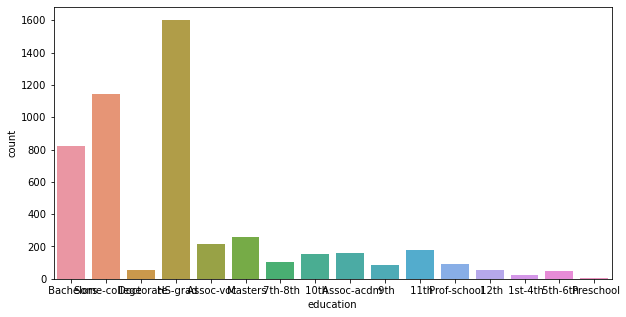

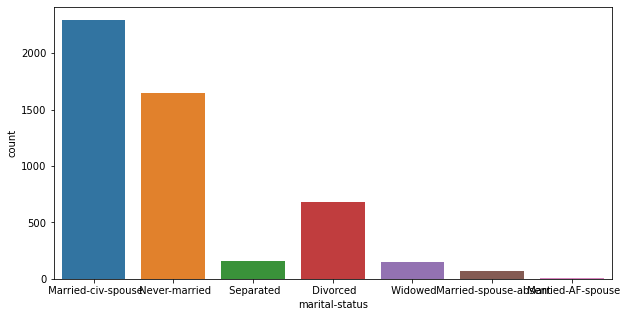

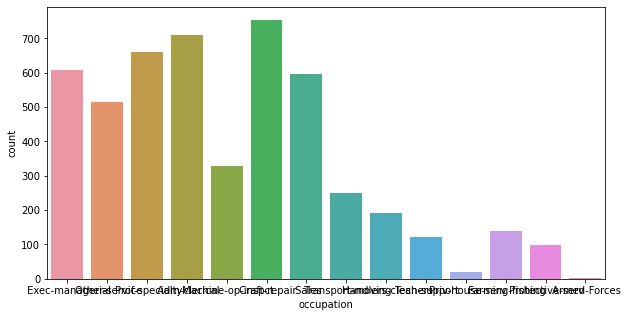

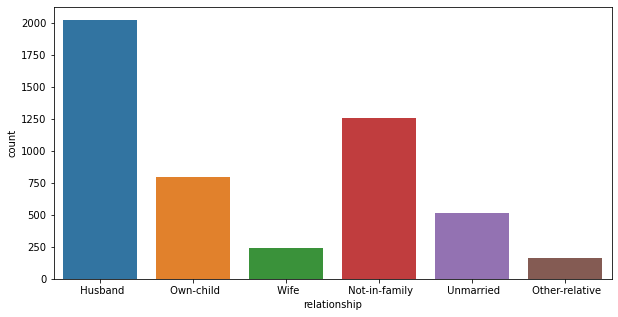

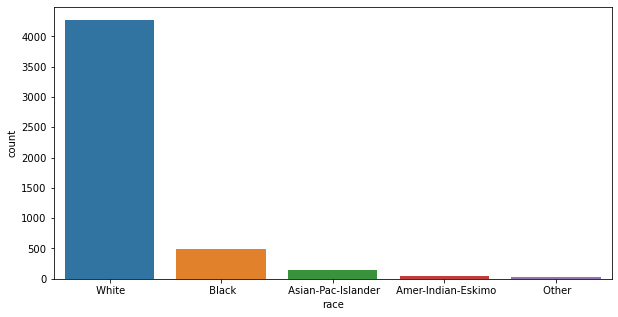

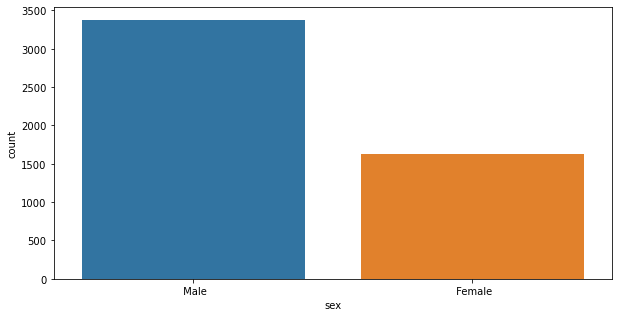

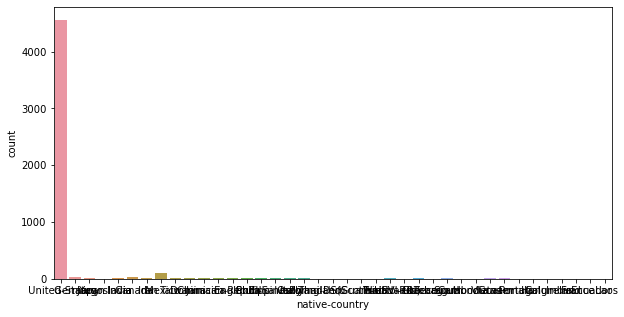

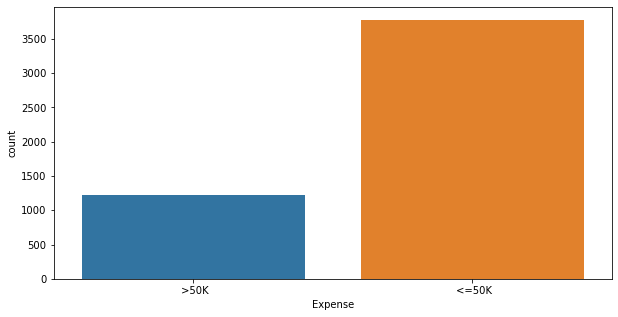

In [803]:
for i in df1.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    sns.countplot(df1[i])

In [804]:
df1['capital-gain']=np.where(df1['capital-gain']>0,1,df1['capital-gain'])
df1['capital-loss']=np.where(df1['capital-loss']>0,1,df1['capital-loss'])

In [805]:
df1['workclass'].value_counts().index

Index([' Private', ' Self-emp-not-inc', 'Private', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

In [806]:
def workclass(df1):
    if df1 in ['Private',' Private']:
        return 'Private'
    elif df1 in [' Self-emp-not-inc',' Self-emp-inc']:
        return 'Self employed'
    elif df1 in [' Local-gov',' State-gov',' Federal-gov']:
        return 'Gov_job'
    else:
        return 'unemployed'

In [807]:
df1['workclass']=df1['workclass'].apply(workclass)

In [808]:
del df1['education']

In [809]:
df1['marital-status'].value_counts().index

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

In [810]:
def maritalstatus(df1):
    if df1 in [' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse']:
        return 'Married'
    else:
        return 'Unmarried'

In [811]:
df1['marital-status']=df1['marital-status'].apply(maritalstatus)

In [812]:
df1['occupation'].value_counts().index

Index([' Craft-repair', ' Adm-clerical', ' Prof-specialty', ' Exec-managerial',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' Transport-moving',
       ' Handlers-cleaners', ' Farming-fishing', ' Tech-support',
       ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'],
      dtype='object')

In [813]:
def occupation(df1):
    if df1 in [' Craft-repair',' Other-service',' Handlers-cleaners',' Farming-fishing',' Protective-serv',' Priv-house-serv']:
        return 'Primary'
    elif df1 in [' Adm-clerical',' Machine-op-inspct',' Sales',' Tech-support',' Armed-Forces']:
        return 'Secondary'
    else:
        return 'Tertiary'

In [814]:
df1['occupation']=df1['occupation'].apply(occupation)

In [815]:
def native(df1):
    if df1==' United-States':
        return 'United_states'
    else:
        return 'others'

In [816]:
df1['native-country']=df1['native-country'].apply(native)

In [817]:
df1['Expense']=df1['Expense'].map({' >50K':1,' <=50K':0})
df1.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self employed,13,Married,Tertiary,Husband,White,Male,1,0,50.0,United_states,1
1,20,Private,10,Unmarried,Primary,Own-child,White,Male,0,0,40.0,United_states,0
2,50,Private,16,Married,Tertiary,Husband,White,Male,0,1,52.5,United_states,1
3,38,Gov_job,9,Married,Tertiary,Wife,White,Female,0,0,40.0,United_states,1
4,23,Gov_job,13,Unmarried,Tertiary,Own-child,White,Female,0,0,52.5,United_states,0


In [818]:
dummy=pd.get_dummies(df1,drop_first=True)

In [819]:
dummy.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Expense,workclass_Private,workclass_Self employed,workclass_unemployed,marital-status_Unmarried,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_others
0,39,13,1,0,50.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,20,10,0,0,40.0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
2,50,16,0,1,52.5,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,38,9,0,0,40.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,23,13,0,0,52.5,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [820]:
x=dummy.drop(columns=['Expense'])
y=dummy['Expense']

In [821]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=2,train_size=0.8)

In [822]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4000, 22), (1000, 22), (4000,), (1000,))

In [823]:
for i in ['age','hours-per-week']:
    x_train[[i]]=StandardScaler().fit_transform(x_train[[i]])

In [824]:
for i in ['age','hours-per-week']:
    x_test[[i]]=StandardScaler().fit_transform(x_test[[i]])

In [825]:
x_train_c=sm.add_constant(x_train)
x_test_c=sm.add_constant(x_test)

In [826]:
model=sm.Logit(y_train,x_train_c).fit()

Optimization terminated successfully.
         Current function value: 0.346040
         Iterations 32


In [827]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Expense   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3977
Method:                           MLE   Df Model:                           22
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.3782
Time:                        16:29:33   Log-Likelihood:                -1384.2
converged:                       True   LL-Null:                       -2226.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.7807      0.743     -7.784      0.000      -7.236      -4.325
age                              0.3488      0.058      6.016      0.000       0.235       0.462
education-num                    0.2844      0.023     12.510      0.000       0.240       0.329
capital-gain                     1.6572      0.156     10.647      0.000       1.352       1.962
capital-loss                     0.9885      0.191      5.176      0.000       0.614       1.363
hours-per-week                   0.4399      0.051      8.551      0.000       0.339       0.541
workclass_Private                0.0854      0.139      0.612      0.540      -0.188       0.359
workclass_Self employed         -0.0213      0.176     -0.121      0.904      -0.367       0.324
workclass_unemployed           -46.9942   1.12e+11  -4.18e-10      1.000    -2.2e+11     2.2e+11
marital-status_Unmarried        -0.4976      0.422     -1.180      0.238      -1.324       0.329
occupation_Secondary             0.1470      0.128      1.152      0.250      -0.103       0.397
occupation_Tertiary              0.6958      0.127      5.494      0.000       0.448       0.944
relationship_ Not-in-family     -1.3579      0.425     -3.192      0.001      -2.192      -0.524
relationship_ Other-relative    -1.8568      0.636     -2.918      0.004      -3.104      -0.609
relationship_ Own-child         -2.5919      0.550     -4.709      0.000      -3.671      -1.513
relationship_ Unmarried         -1.2867      0.480     -2.683      0.007      -2.227      -0.347
relationship_ Wife               1.4728      0.268      5.491      0.000       0.947       1.999
race_ Asian-Pac-Islander         1.1871      0.732      1.621      0.105      -0.248       2.622
race_ Black                      1.0420      0.688      1.515      0.130      -0.306       2.390
race_ Other                     -0.2355      1.084     -0.217      0.828      -2.361       1.890
race_ White                      1.1223      0.665      1.688      0.091      -0.180       2.425
sex_ Male                        0.6297      0.200      3.141      0.002       0.237       1.023
native-country_others           -0.2277      0.203     -1.124      0.261      -0.625       0.169
================================================================================================
"""

In [828]:
y_pred_prob=model.predict(x_test_c)

In [829]:
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [830]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score,cohen_kappa_score

In [831]:
def validation(test,pred):
    print('confusion matrix\n', confusion_matrix(test,pred))
    print('accuracy_score\n', accuracy_score(test,pred))
    print('precision_score\n', precision_score(test,pred))
    print('recall_score\n', recall_score(test,pred))
    print('F1 score\n', f1_score(test,pred))
    print('Cohen-kappa\n', cohen_kappa_score(test,pred))
    print('classification_report\n', classification_report(test,pred))

In [832]:
validation(y_test,y_pred)

confusion matrix
 [[690  65]
 [101 144]]
accuracy_score
 0.834
precision_score
 0.6889952153110048
recall_score
 0.5877551020408164
F1 score
 0.6343612334801764
Cohen-kappa
 0.5278591541283881
classification_report
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       755
           1       0.69      0.59      0.63       245

    accuracy                           0.83      1000
   macro avg       0.78      0.75      0.76      1000
weighted avg       0.83      0.83      0.83      1000



In [833]:
from sklearn.metrics import roc_auc_score,roc_curve

In [834]:
def roc(x,y):
    fpr,tpr,thresh=roc_curve(x,y)
    print('AUC:\t',roc_auc_score(x,y))
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],'b--')

AUC:	 0.8885416948236249


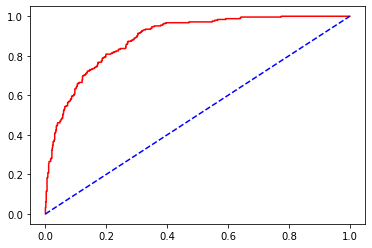

In [835]:
roc(y_test,y_pred_prob)

# Model 2 (balancing the Data )

In [836]:
from imblearn.over_sampling import RandomOverSampler

In [837]:
ros=RandomOverSampler(random_state=2)

In [838]:
x_sam,y_sam=ros.fit_resample(x_train_c,y_train)

In [839]:
y_sam.value_counts()

1    3021
0    3021
Name: Expense, dtype: int64

In [840]:
balance_model=sm.Logit(y_sam,x_sam).fit()

         Current function value: 0.405510
         Iterations: 35


In [841]:
balance_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Expense   No. Observations:                 6042
Model:                          Logit   Df Residuals:                     6019
Method:                           MLE   Df Model:                           22
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.4150
Time:                        16:29:34   Log-Likelihood:                -2450.1
converged:                      False   LL-Null:                       -4188.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.1756      0.600     -8.628      0.000      -6.351      -4.000
age                              0.4192      0.044      9.569      0.000       0.333       0.505
education-num                    0.2854      0.017     16.567      0.000       0.252       0.319
capital-gain                     1.7456      0.130     13.451      0.000       1.491       2.000
capital-loss                     0.9375      0.154      6.075      0.000       0.635       1.240
hours-per-week                   0.4540      0.040     11.244      0.000       0.375       0.533
workclass_Private                0.0616      0.104      0.592      0.554      -0.142       0.266
workclass_Self employed         -0.0425      0.135     -0.314      0.754      -0.308       0.223
workclass_unemployed           -14.7635   6456.939     -0.002      0.998   -1.27e+04    1.26e+04
marital-status_Unmarried        -0.8866      0.289     -3.069      0.002      -1.453      -0.320
occupation_Secondary             0.1030      0.092      1.118      0.263      -0.078       0.284
occupation_Tertiary              0.6818      0.095      7.157      0.000       0.495       0.869
relationship_ Not-in-family     -1.0578      0.298     -3.551      0.000      -1.642      -0.474
relationship_ Other-relative    -1.1201      0.369     -3.032      0.002      -1.844      -0.396
relationship_ Own-child         -2.3713      0.368     -6.448      0.000      -3.092      -1.651
relationship_ Unmarried         -1.0012      0.333     -3.006      0.003      -1.654      -0.348
relationship_ Wife               1.5602      0.197      7.938      0.000       1.175       1.945
race_ Asian-Pac-Islander         2.1197      0.591      3.587      0.000       0.961       3.278
race_ Black                      1.5399      0.563      2.733      0.006       0.436       2.644
race_ Other                      0.8935      0.835      1.071      0.284      -0.742       2.529
race_ White                      1.6032      0.550      2.915      0.004       0.525       2.681
sex_ Male                        0.6673      0.136      4.918      0.000       0.401       0.933
native-country_others           -0.3625      0.150     -2.420      0.016      -0.656      -0.069
================================================================================================
"""

In [842]:
y_pred_prob_balanced=balance_model.predict(x_test_c)

In [843]:
y_pred1=[0 if x<0.5 else 1 for x in y_pred_prob_balanced]

In [844]:
validation(y_test,y_pred1)

confusion matrix
 [[573 182]
 [ 39 206]]
accuracy_score
 0.779
precision_score
 0.5309278350515464
recall_score
 0.8408163265306122
F1 score
 0.65086887835703
Cohen-kappa
 0.5009934971098267
classification_report
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       755
           1       0.53      0.84      0.65       245

    accuracy                           0.78      1000
   macro avg       0.73      0.80      0.74      1000
weighted avg       0.84      0.78      0.79      1000



AUC:	 0.8896607649682389


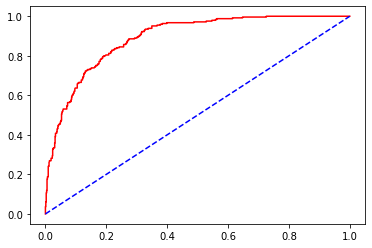

In [845]:
roc(y_test,y_pred_prob_balanced)

In [846]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob_balanced)

In [847]:
table=pd.DataFrame({'FPR':fpr,'TPR':tpr,'THRESH':thresh,'diff':np.abs(fpr-tpr)})

In [848]:
table.sort_values(by='diff',ascending=False)

,FPR,TPR,THRESH,diff
184,0.274172,0.885714,0.429561,0.611542
158,0.218543,0.828571,0.518974,0.610028
162,0.227815,0.836735,0.511271,0.608920
182,0.272848,0.881633,0.431716,0.608785
147,0.192053,0.800000,0.544521,0.607947
145,0.188079,0.795918,0.549442,0.607839
160,0.225166,0.832653,0.513891,0.607487
183,0.274172,0.881633,0.430859,0.607460
180,0.270199,0.877551,0.437126,0.607352
156,0.217219,0.824490,0.519818,0.607271


In [849]:
y_pred2=[0 if x<0.36 else 1 for x in y_pred_prob_balanced]

In [850]:
validation(y_test,y_pred2)

confusion matrix
 [[513 242]
 [ 19 226]]
accuracy_score
 0.739
precision_score
 0.4829059829059829
recall_score
 0.9224489795918367
F1 score
 0.6339410939691444
Cohen-kappa
 0.4603870327489249
classification_report
               precision    recall  f1-score   support

           0       0.96      0.68      0.80       755
           1       0.48      0.92      0.63       245

    accuracy                           0.74      1000
   macro avg       0.72      0.80      0.72      1000
weighted avg       0.85      0.74      0.76      1000



In [851]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [852]:
dc=DecisionTreeClassifier()
model_Decession=dc.fit(x_train,y_train)

In [853]:
pred=model_Decession.predict(x_test)

In [854]:
accuracy_score(y_test,pred)

0.794

In [855]:
validation(y_test,pred)

confusion matrix
 [[644 111]
 [ 95 150]]
accuracy_score
 0.794
precision_score
 0.5747126436781609
recall_score
 0.6122448979591837
F1 score
 0.5928853754940712
Cohen-kappa
 0.4551849990743435
classification_report
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       755
           1       0.57      0.61      0.59       245

    accuracy                           0.79      1000
   macro avg       0.72      0.73      0.73      1000
weighted avg       0.80      0.79      0.80      1000



In [856]:
def model_result(model,x_train,y_train,x_test,y_test):
    print(str(model))
    
    
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    validation(y_test,y_pred)

    y_pred_proba=model.predict_proba(x_test)[:,1]
    roc(y_test,y_pred_proba)
    

LogisticRegression()
confusion matrix
 [[690  65]
 [100 145]]
accuracy_score
 0.835
precision_score
 0.6904761904761905
recall_score
 0.5918367346938775
F1 score
 0.6373626373626373
Cohen-kappa
 0.5313831297926725
classification_report
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       755
           1       0.69      0.59      0.64       245

    accuracy                           0.83      1000
   macro avg       0.78      0.75      0.77      1000
weighted avg       0.83      0.83      0.83      1000

AUC:	 0.8903527503716717


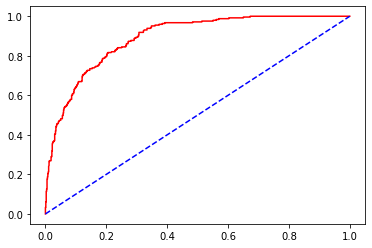

In [857]:
model_result(LogisticRegression(penalty='l2'),x_train,y_train,x_test,y_test)

KNeighborsClassifier(n_neighbors=7)
confusion matrix
 [[677  78]
 [ 97 148]]
accuracy_score
 0.825
precision_score
 0.6548672566371682
recall_score
 0.6040816326530613
F1 score
 0.6284501061571125
Cohen-kappa
 0.5142397157608394
classification_report
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       755
           1       0.65      0.60      0.63       245

    accuracy                           0.82      1000
   macro avg       0.76      0.75      0.76      1000
weighted avg       0.82      0.82      0.82      1000

AUC:	 0.851133937018516


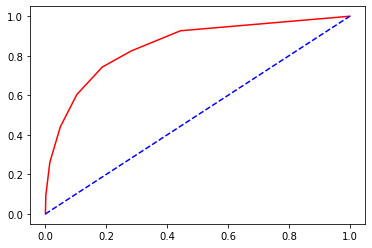

In [858]:
model_result(KNeighborsClassifier(n_neighbors=7),x_train,y_train,x_test,y_test)

RandomForestClassifier(max_depth=5, n_estimators=494, random_state=494)
confusion matrix
 [[727  28]
 [130 115]]
accuracy_score
 0.842
precision_score
 0.8041958041958042
recall_score
 0.46938775510204084
F1 score
 0.5927835051546392
Cohen-kappa
 0.5030352593338157
classification_report
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       755
           1       0.80      0.47      0.59       245

    accuracy                           0.84      1000
   macro avg       0.83      0.72      0.75      1000
weighted avg       0.84      0.84      0.83      1000

AUC:	 0.892047573996486


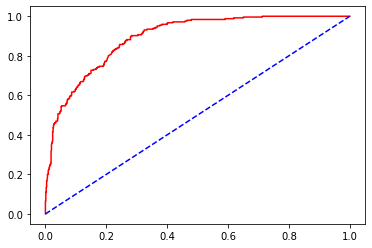

In [859]:
model_result(RandomForestClassifier(n_estimators=494,max_depth=5,random_state=494),x_train,y_train,x_test,y_test)

In [860]:
from imblearn.over_sampling import SMOTE

In [861]:
smote=SMOTE(random_state=494)

In [862]:
x_train_s,y_train_s=smote.fit_resample(x_train,y_train)

In [863]:
from lightgbm import LGBMClassifier

LGBMClassifier()
confusion matrix
 [[690  65]
 [ 88 157]]
accuracy_score
 0.847
precision_score
 0.7072072072072072
recall_score
 0.6408163265306123
F1 score
 0.6723768736616702
Cohen-kappa
 0.5728881692814471
classification_report
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       755
           1       0.71      0.64      0.67       245

    accuracy                           0.85      1000
   macro avg       0.80      0.78      0.79      1000
weighted avg       0.84      0.85      0.84      1000

AUC:	 0.8932044870928504


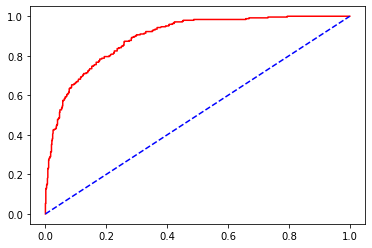

In [864]:
model_result(LGBMClassifier(),x_train,y_train,x_test,y_test)

In [ ]:
tuned_para={'boosting_type':['gbdt','dart','goss'],'num_leaves':range(1,31),'learning_rate':[0.01,0.1,1,100],'reg_alpha':[0.001,0.01,0.1,1],'n_estimators':[100,200,300,400,500]}
gscv=GridSearchCV(estimator=LGBMClassifier(),param_grid=tuned_para,cv=5,verbose=3)
gscv.fit(x_train,y_train)


Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
[CV 1/5] END boosting_type=gbdt, learning_rate=0.01, n_estimators=100, num_leaves=1, reg_alpha=0.001;, score=nan total time=   0.0s
[CV 2/5] END boosting_type=gbdt, learning_rate=0.01, n_estimators=100, num_leaves=1, reg_alpha=0.001;, score=nan total time=   0.0s
[CV 3/5] END boosting_type=gbdt, learning_rate=0.01, n_estimators=100, num_leaves=1, reg_alpha=0.001;, score=nan total time=   0.0s
[CV 4/5] END boosting_type=gbdt, learning_rate=0.01, n_estimators=100, num_leaves=1, reg_alpha=0.001;, score=nan total time=   0.0s
[CV 5/5] END boosting_type=gbdt, learning_rate=0.01, n_estimators=100, num_leaves=1, reg_alpha=0.001;, score=nan total time=   0.0s
[CV 1/5] END boosting_type=gbdt, learning_rate=0.01, n_estimators=100, num_leaves=1, reg_alpha=0.01;, score=nan total time=   0.0s
[CV 2/5] END boosting_type=gbdt, learning_rate=0.01, n_estimators=100, num_leaves=1, reg_alpha=0.01;, score=nan total time=   0.0s
[CV 3/5] END